# Dataset Utils

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from util.dataset_util import get_data_from_csv
from util.plots_util import plot_heatmap

## Visualization

In [7]:
df = pd.read_csv("datasets/avrora_real_saved_states.csv")
df.iloc[:, 0].values

array([20, 16, 24,  8, 20, 20,  4, 16, 24,  8, 20, 20,  4, 16, 24, 20,  8,
        4, 12, 24,  4,  4, 12, 24,  4, 12, 24, 12,  8, 12, 16,  8, 12, 16,
        8, 16])

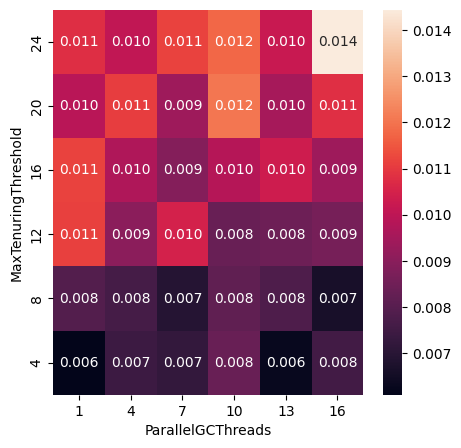

In [8]:
target_goal = "avgGCPause"

df = pd.read_csv("datasets/avrora_real_saved_states.csv")
x = df.iloc[:, 0].values
y = df.iloc[:, 1].values
z = df.iloc[:, 2].values
# x, y, z = get_data_from_csv(
#     csv_dir= "summaries_avrora", 
#     goal = target_goal)

plot_heatmap(x, y, z)

# avrora_df = pd.DataFrame({
#     "ParallelGCThreads": x,
#     "MaxTenuringThreshold": y,
#     "Average GC Pause": z,
# })
# avrora_df.to_csv("avrora_real_saved_states.csv", index=False)
## Default values (avrora)
# x.append(15)
# y.append(16)
# z.append(0.01106)

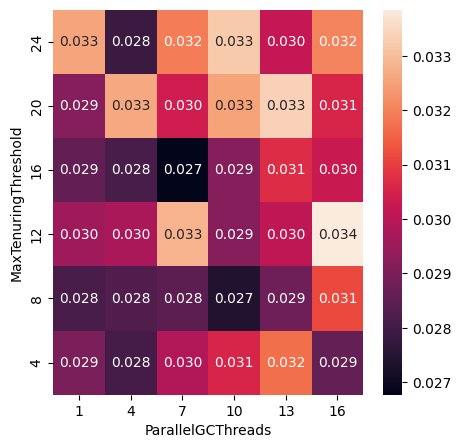

In [9]:
target_goal = "avgGCPause"

df = pd.read_csv("datasets/kafka_real_saved_states.csv")
x = df.iloc[:, 0].values
y = df.iloc[:, 1].values
z = df.iloc[:, 2].values
# x, y, z = get_data_from_csv(
#     csv_dir= "summaries_kafka", 
#     goal = target_goal)

plot_heatmap(x, y, z)

# kafka_df = pd.DataFrame({
#     "ParallelGCThreads": x,
#     "MaxTenuringThreshold": y,
#     "Average GC Pause": z,
# })
# kafka_df.to_csv("kafka_real_saved_states.csv", index=False)

## Create a synthetic dataset

Многоэкстремальная двумерная функция, построена как сумма N гиперболических потенциалов.

http://conf.nsc.ru/files/conferences/Lyap-100/fulltext/72212/84279/%D0%9A%D1%83%D0%B7%D0%BD%D0%B5%D1%86%D0%BE%D0%B2_%D0%90%D0%92_%D0%A0%D1%83%D0%B1%D0%B0%D0%BD_%D0%90%D0%98_%D0%90%D0%BB%D0%B3.pdf

### Synthetic dataset 1

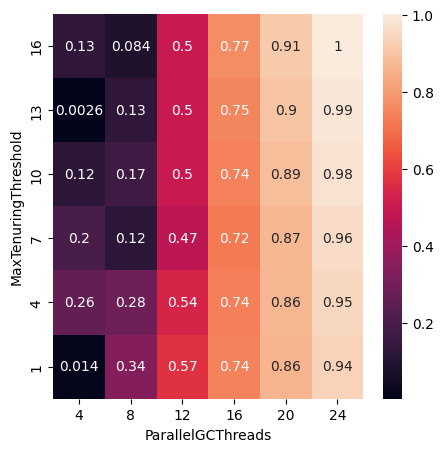

In [4]:
def z_1(x, y):
    return - 1 / (0.1*abs(x - 4)**0.9 + 0.1*abs(y - 1)**1.5 + 0.37)

# def z_2(x, y):
#     return - 1 / (0.1*abs(x - 4)**0.9 + 0.1*abs(y - 4)**1.5 + 0.45)

def z_2(x, y):
    return - 1 / (0.03*abs(x - 8)**1.5 + 0.03*abs(y - 7)**1.5 + 0.45)

def z_3(x, y):
    return - 1 / (0.05*abs(x - 4)**1.5 + 0.02*abs(y - 13)**1.5 + 0.4)

def z_5(x, y):
    return - 1 / (0.03*abs(x - 8)**1.5 + 0.03*abs(y - 16)**1.5 + 0.4)

def func(x, y):
    return z_1(x, y) + z_2(x, y) + z_3(x, y) + z_5(x, y)

new_z = []
new_x = []
new_y = []

for i in range(4, 24 + 1, 4):
    for j in range(1, 16 + 1, 3):
        new_x.append(i)
        new_y.append(j)
        new_z.append(func(int(i), int(j)))

# Normalize
max_z = max(new_z)
min_z = min(new_z)
new_z = [(each - min_z  + 0.01)/  (max_z - min_z) for each in new_z]

fig, ax = plt.subplots(figsize=(5, 5))

curve_data = pd.DataFrame({'ParallelGCThreads': new_x, 'MaxTenuringThreshold': new_y, 'Average GC Pause': new_z})
curve_data['MaxTenuringThreshold'] = curve_data['MaxTenuringThreshold'].astype(int)
curve_data['ParallelGCThreads'] = curve_data['ParallelGCThreads'].astype(int)
curve_data_pivoted = curve_data.pivot(index="ParallelGCThreads", columns="MaxTenuringThreshold", values="Average GC Pause")
curve_data_pivoted = curve_data_pivoted.transpose()

ax = sns.heatmap(curve_data_pivoted,  ax=ax, annot=True, fmt=".2g") # annot=True, fmt=""
ax.invert_yaxis()
plt.show()

curve_data.to_csv("avrora_synthetic_saved_states.csv", index=False)

### Synthetic dataset 2

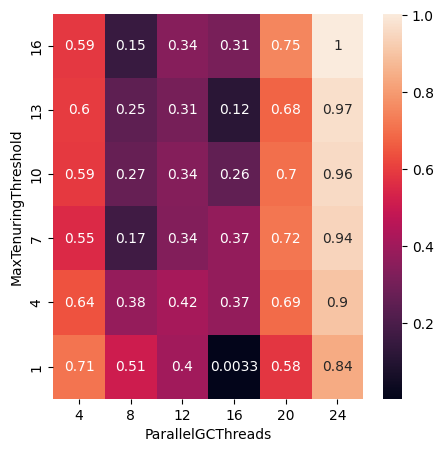

In [5]:
def z_1(x, y):
    return - 1 / (0.1*abs(x - 16)**0.9 + 0.1*abs(y - 1)**1.5 + 0.37)

# def z_2(x, y):
#     return - 1 / (0.1*abs(x - 4)**0.9 + 0.1*abs(y - 4)**1.5 + 0.45)

def z_2(x, y):
    return - 1 / (0.03*abs(x - 8)**1.5 + 0.03*abs(y - 7)**1.5 + 0.45)

def z_3(x, y):
    return - 1 / (0.05*abs(x - 16)**1.5 + 0.02*abs(y - 13)**1.5 + 0.4)

def z_5(x, y):
    return - 1 / (0.03*abs(x - 8)**1.5 + 0.03*abs(y - 16)**1.5 + 0.4)

def func(x, y):
    return z_1(x, y) + z_2(x, y) + z_3(x, y) + z_5(x, y)

new_z = []
new_x = []
new_y = []

for i in range(4, 24 + 1, 4):
    for j in range(1, 16 + 1, 3):
        new_x.append(i)
        new_y.append(j)
        new_z.append(func(int(i), int(j)))

# Normalize
max_z = max(new_z)
min_z = min(new_z)
new_z = [(each - min_z  + 0.01)/  (max_z - min_z) for each in new_z]

fig, ax = plt.subplots(figsize=(5, 5))

curve_data = pd.DataFrame({'ParallelGCThreads': new_x, 'MaxTenuringThreshold': new_y, 'Average GC Pause': new_z})
curve_data['MaxTenuringThreshold'] = curve_data['MaxTenuringThreshold'].astype(int)
curve_data['ParallelGCThreads'] = curve_data['ParallelGCThreads'].astype(int)
curve_data_pivoted = curve_data.pivot(index="ParallelGCThreads", columns="MaxTenuringThreshold", values="Average GC Pause")
curve_data_pivoted = curve_data_pivoted.transpose()

ax = sns.heatmap(curve_data_pivoted,  ax=ax, annot=True, fmt=".2g") # annot=True, fmt=""
ax.invert_yaxis()
plt.show()

curve_data.to_csv("kafka_synthetic_saved_states.csv", index=False)

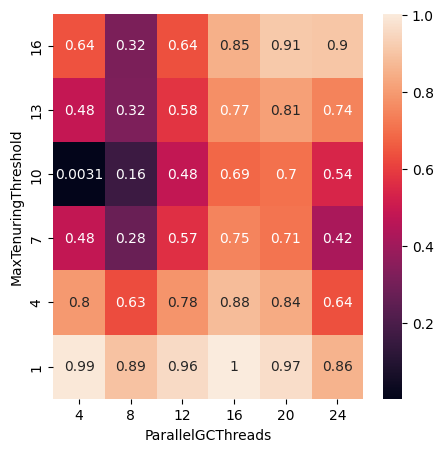

In [9]:
def z_1(x, y):
    return - 1 / (0.1*abs(x - 4)**0.9 + 0.1*abs(y - 10)**1.5 + 0.37)

# def z_2(x, y):
#     return - 1 / (0.1*abs(x - 4)**0.9 + 0.1*abs(y - 4)**1.5 + 0.45)

def z_2(x, y):
    return - 1 / (0.03*abs(x - 8)**1.5 + 0.03*abs(y - 7)**1.5 + 0.45)

def z_3(x, y):
    return - 1 / (0.05*abs(x - 24)**1.5 + 0.02*abs(y - 7)**1.5 + 0.4)

def z_5(x, y):
    return - 1 / (0.03*abs(x - 8)**1.5 + 0.03*abs(y - 16)**1.5 + 0.4)

def func(x, y):
    return z_1(x, y) + z_2(x, y) + z_3(x, y) + z_5(x, y)

new_z = []
new_x = []
new_y = []

for i in range(4, 24 + 1, 4):
    for j in range(1, 16 + 1, 3):
        new_x.append(i)
        new_y.append(j)
        new_z.append(func(int(i), int(j)))

# Normalize
max_z = max(new_z)
min_z = min(new_z)
new_z = [(each - min_z  + 0.01)/  (max_z - min_z) for each in new_z]

fig, ax = plt.subplots(figsize=(5, 5))

curve_data = pd.DataFrame({'ParallelGCThreads': new_x, 'MaxTenuringThreshold': new_y, 'Average GC Pause': new_z})
curve_data['MaxTenuringThreshold'] = curve_data['MaxTenuringThreshold'].astype(int)
curve_data['ParallelGCThreads'] = curve_data['ParallelGCThreads'].astype(int)
curve_data_pivoted = curve_data.pivot(index="ParallelGCThreads", columns="MaxTenuringThreshold", values="Average GC Pause")
curve_data_pivoted = curve_data_pivoted.transpose()

ax = sns.heatmap(curve_data_pivoted,  ax=ax, annot=True, fmt=".2g") # annot=True, fmt=""
ax.invert_yaxis()
plt.show()

curve_data.to_csv("test_synthetic_saved_states.csv", index=False)

# External Info

In [3]:
goals = ["avgGCPause", "totalTenuredUsedMax", "avgPause", "freedMemoryByFullGC", "avgPromotion"]

In [5]:
bm = "avrora"

x, y, z =  get_data_from_csv(f"summaries_{bm}", goals)

df = pd.DataFrame({
    "MaxTenuringThreshold": y,
    "ParallelGCThreads": x,
})
df[goals] = z
display(df[:5])
# df.to_csv(f"datasets/ext_{bm}_real_saved_states.csv", index=False)

,MaxTenuringThreshold,ParallelGCThreads,avgGCPause,totalTenuredUsedMax,avgPause,freedMemoryByFullGC,avgPromotion
0,10,20,0.01203,4747.0,0.05439,3072.0,-439501.0
1,10,16,0.00983,4773.0,0.05349,3072.0,-306176.0
2,7,24,0.01115,4724.0,0.05620,3072.0,-419430.0
3,16,8,0.00665,4720.0,0.04569,3072.0,-280576.0
4,1,20,0.00989,4800.0,0.05470,4096.0,-270541.0


In [6]:
bm = "kafka"

x, y, z =  get_data_from_csv(f"summaries_{bm}", goals)

df = pd.DataFrame({
    "MaxTenuringThreshold": y,
    "ParallelGCThreads": x,
})
df[goals] = z
display(df[:5])
# df.to_csv(f"datasets/ext_{bm}_real_saved_states.csv", index=False)

,MaxTenuringThreshold,ParallelGCThreads,avgGCPause,totalTenuredUsedMax,avgPause,freedMemoryByFullGC,avgPromotion
0,10,12,0.02917,166.521,0.16942,27.0,18.142
1,10,8,0.02740,166.475,0.15709,18.0,17.913
2,7,20,0.03037,166.423,0.17345,29.0,18.347
3,10,4,0.03058,166.504,0.15914,18.0,18.038
4,10,24,0.03323,166.503,0.17630,29.0,18.145
